<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSIT</div>
        <div style="display:inline;width:15%;">e09b</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Structures de données</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Structures hiérarchiques: Arbres binaires</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Définitions et parcours</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
- Définition (sous-arbres gauches, sous-arbres droits, structure de données récursive)
- Calculer la taille et la hauteur d’un arbre. 
- Parcourir un arbre de différentes façons (ordres infixe, préfixe ou suffixe ; ordre en largeur d’abord).

<div class = "alert alert-info">
    
**Sommaire :**

<a href=#definitions>Définitions</a>   
<a href=#dictionnaire>Implémentation avec un dictionnaire </a>  
<a href=#liste_recursive>Implémentation avec une liste récursive</a>  
<a href=#POO>La classe Arbre</a>  
<a href=#Morse>Hauteur et taille d'un arbre binaire (Application au code Morse) </a>  
<a href=#POO_suite>Méthodes de la classe Arbre</a>  
<a href=#parcours>Parcours</a>  
</div>

![Chemin_bianire](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources/chemin_bianire_01.png?raw=true)<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Le trésor est se trouve sous le poteau désigné par l'itinéraire 0 0 1. Lequel est-ce ?</span>


<div id="definitions"></div>

## Définitions

<div class = "alert alert-success">
    Un arbre binaire est un arbre <b>d'arité 2</b><br>
</div> 

Ce qui revent à dire que chaque noeud a un <b>dégré</b> maximum de 2, ou, que chaque noeuds a au plus 2 noeuds enfants.


<u><i>Arbre_binaire_1:</i></u>
![Un_arbre_binaire](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_simple.png?raw=true)

Dans un arbre binaire **complet**, tous les noeuds n'ont que 0 ou 2 enfants. (Jamais 1).  
<u><i>Arbre_binaire_2:</i></u>
![Un_arbre_binaire_complet](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_2_simple.png?raw=true)

<div id="dictionnaire"></div>

## Implémentation avec un dictionnaire

Comme nous l'avons vu précédemment pour les graphes et les autre arbres, les arbres binaires peuvent aussi être décrits par une **matrice** ou une **liste d'adjacence** et implémentés avec le dictionnaire associé à cette matrice ou à cette liste.  

Ici, nous allons coder l'arbre binaire avec un dictionnaire dont les clés sont les différents noeuds et les valeurs, la liste des noeuds enfants. (Ce qui correspond à une liste des successeurs dans un arbre orienté.)

In [ ]:
# Codage de l'arbre binaire 1
{   'A': ['B','C'],
    'B': ['D','E'],
    'C': ['F','G'],
    'D': [],
    'E': [],
    'F': ['H'],
    'G': [],
    'H': ['I'],
    'I': [] }

Avec cette approche, on reconnait facilement les feuilles.  
Le noeuds D par exemple est associé à la liste vide: il n'a pas d'enfant.

**A vous de jouer:**
Proposez le codage du dictionnaire décrivant l'arbre_binaire_2.

In [ ]:
# Codage de l'arbre binaire 2
{   'A': [],
    'B': [],
    'C': [],
    'D': [],
    'E': [],
    'F': [],
    'G': [],
    'H': [],
    'I': [],
    'J': [],
    'K': [] }

&#x2705; <a href="https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/reponse1">Correction</a></div>

<div id="liste_recursive"></div>

## Implémentation avec une liste récursive

On peut aussi remarquer qu'un arbre est une racine à laquelle on a greffé deux sous-arbres.  

<u><i>Arbre_binaire_1:</i></u>
![sous_arbres_niv1](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_simple_sous_arbres_01.png?raw=true)

Le noeud B devient alors la racine d'un des sous-arbre. De même pour C.   
![sous_arbres_niv2](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_simple_sous_arbres_02.png?raw=true)

Afin de pouvoir généraliser cette approche, nous allons compléter notre arbre avec des **noeuds vides** afin de le ramener à un arbre binaire complet.  
Les noeuds vides sont désignés par **None** (représentés par des petits ronds gris ci-dessous):
- Les noeuds qui  n'ont qu'un seul enfant (comme F ou H), sont complétés par un enfant **None**.
- Les feuilles aussi (comme D et G), pour être considérées comme des sous-arbres doivent disposer de 2 enfants: on leur ajoute aussi deux noeuds enfants **None**.

![arbre_binaire_1_complété](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_complet.png?raw=true)
Cela nous permet d'obtenir une nouvelle représentation de l'arbre.  
Chaque arbre, ou sous-arbre est repésenté par une liste contenant: 

In [ ]:
[ nom_de_la_racine, sous_arbre_gauche, sous_arbre_droit]

Ainsi, notre arbre_binaire_1 peut être codé par la liste arbreA:

In [ ]:
arbreI = ['I', None, None]
arbreH = ['H', None, arbreI]
arbreF = ['F', arbreH, None]
arbreG = ['G', None, None]
arbreC = ['C', arbreF, arbreG]
arbreD = ['D', None, None]
arbreE = ['E', None, None]
arbreB = ['B', arbreD, arbreE]
arbreA = ['A', arbreB, arbreC]

# Ou alors, en une ligne, sans construction intermédiaire:

arbreA = ['A',['B', ['D', None, None], ['E', None, None]], 
          ['C', ['F', ['H', None, ['I', None, None]], None], ['G', None, None]]]

Voila à quoi ressemble la représentation mémoire de cette écriture vue par <a href="http://pythontutor.com/visualize.html#code=arbreA%20%3D%20%5B'A',%5B'B',%20%5B'D',%20None,%20None%5D,%20%5B'E',%20None,%20None%5D%5D,%20%0A%20%20%20%20%20%20%20%20%20%20%5B'C',%20%5B'F',%20%5B'H',%20None,%20%5B'I',%20None,%20None%5D%5D,%20None%5D,%20%5B'G',%20None,%20None%5D%5D%5D&cumulative=false&curInstr=2&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false">Pythontuor</a>:
![representation_Python_tutor](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_complet_pythontutor.png?raw=true)

**A vous de jouer:** Ecrivez la liste récursive décrivant l'arbre_binaire_2. Copiez-la sur <a href="http://pythontutor.com/visualize.html#mode=edit">Pyhtontutor</a> pour la tester.

<div id="POO"></div>

## POO: Implémentation avec la classe Arbre

Il existe encore d'autres façons de modéliser des arbres binaires, mais nous allons maintenant nous intéresser plus précisément à une implémentation orientée objet.  
Nous souhaitons que les arbres binaires soient des instances d'une classe nommée Arbre. 

Voilà à quoi ressemble l'interface de cette première version:

<table style="width:200px;">
    <tr>
        <td style="width:200px;background-color:#CCD;text-align:left">
            <big>
            <b>Arbre</b>
            </big>
        </td>
    </tr> 
    <tr>
        <td style="width:200px;background-color:#EEF;text-align:left">
            <big>
            <i><u>Attributs :</u></i><br>
            label ('' par défaut)<br>
            G (None à l'initialisation)<br>
            D (None à l'initialisation)<br>
            </big>
        </td>
    </tr> 
    <tr>
        <td style="width:200px;background-color:#CCD;text-align:left">
            <big>
            <i><u>Méthodes:</u></i><br>
                <i><small>- rien pour l'instant -</small></i><br>
            </big>
        </td>
    </tr> 
</table>


Soit un arbre binaire A.  
<code>A.label</code> désigne le nom de la racine.  
<code>A.G</code> désigne son sous-arbre gauche.  
<code>A.D</code> désigne son sous-arbre droit.  
Voici l'implémentation de cette classe:

In [7]:
class Arbre():
    def __init__(self,nom=''):
        self.label = nom
        self.G = None
        self.D = None

Les lignes suivantes présentent la succession de codes pour créer l'arbre_bininaire_1:

In [8]:
A = Arbre('A') # Instanciation de l'arbre A, sans enfant.
A.G = Arbre('B') # Instanciation de l'arbe B et affectation en tant que sous-arbre gauche de A
A.D = Arbre('C') # Instanciation de l'arbe C et affectation en tant que sous-arbre droit de A
A.G.G = Arbre('D') # A.G.G désigne B.G
A.G.D = Arbre('E') # A.G.D désigne B.D

Voila à quoi ressemble notre arbre pour l'instant.  Mais ce n'est pas fini, il manque encore des sous-arbres à greffer sur C:
![arbre_binaire_A_en_construction](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_en_construction.png?raw=true)

In [9]:
A.D.G = Arbre('F') # A.D désigne C. F devient son sous-arbre gauche
A.D.D = Arbre('G')
A.D.G.G = Arbre('H') # A.D.G désigne F
A.D.G.G.D = Arbre('I') # A.D.G.G  désigne H

Finalement, nous avons reconstruit notre arbre:
![arbre_bianire_1_reconstruit](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_complet_reconstruit.png?raw=true)

L'intégralité de ce code (Classe plus instanciations) dans <a href = "http://pythontutor.com/visualize.html#code=class%20Arbre%28%29%3A%0A%20%20%20%20def%20__init__%28self,nom%3D''%29%3A%0A%20%20%20%20%20%20%20%20self.label%20%3D%20nom%0A%20%20%20%20%20%20%20%20self.G%20%3D%20None%0A%20%20%20%20%20%20%20%20self.D%20%3D%20None%0A%0AA%20%3D%20Arbre%28'A'%29%20%23%20Instanciation%20de%20l'arbre%20A,%20sans%20enfant.%0AA.G%20%3D%20Arbre%28'B'%29%20%23%20Instanciation%20de%20l'arbe%20B%20et%20affectation%20en%20tant%20que%20sous-arbre%20gauche%20de%20A%0AA.D%20%3D%20Arbre%28'C'%29%20%23%20Instanciation%20de%20l'arbe%20C%20et%20affectation%20en%20tant%20que%20sous-arbre%20droit%20de%20A%0AA.G.G%20%3D%20Arbre%28'D'%29%20%23%20A.G.G%20d%C3%A9signe%20B.G%0AA.G.D%20%3D%20Arbre%28'E'%29%20%23%20A.G.D%20d%C3%A9signe%20B.D%0AA.D.G%20%3D%20Arbre%28'F'%29%20%23%20A.D%20d%C3%A9signe%20C.%20F%20devient%20son%20sous-arbre%20gauche%0AA.D.D%20%3D%20Arbre%28'G'%29%0AA.D.G.G%20%3D%20Arbre%28'H'%29%20%23%20A.D.G%20d%C3%A9signe%20F%0AA.D.G.G.D%20%3D%20Arbre%28'I'%29%20%23%20A.D.G.G%20%20d%C3%A9signe%20H&cumulative=false&curInstr=55&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false">Pythontutor</a> permet d'observer une représentation mémoire de l'arbre.

Une expression mathématique peut être représentée par un arbre bianire:
![expression_mathematique](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_expr_math.png?raw=true)

**A vous de jouer:** Implémentez (complétez) l'arbre nommé M correspondant à l'équation ci-dessus.  
Puis, répondez aux questions posées en commentaires.

In [ ]:
M = Arbre('+')
M.G = Arbre('-')
M.D = Arbre('1')

# Quelle est la nature des noeuds représentants des valeurs numériques? ...
# Quelle est la nature des noeuds repésentants des opérateurs ? ...
# Quelle expression mathématique code cet arbre? M = ...
# Cet arbre binaire est-il complet ? ...
# Donnez sa taille: ...
# Donnez sa hauteur: ...

&#x2705; <a href="https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/reponse3">Correction</a></div>


<div id="Morse"></div>

## Hauteur et taille d'un arbre binaire (Application au code Morse)
![code_Morse](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_morse2.png?raw=true)

Le code Morse peut être représenté par un arbre bianire.  
Remarque, les cases blanches ne correspondent pas à un noeud vide, mais à l'absence d'étiquette. Ces cases peuvent avoir des enfants.  
Si on désigne par un **0** l'utilisation d'un **point** (Dot) et par un **1** l'utilisation d'un **trait** (Dash), on peut reprérer chaque caractère par un mot binaire:  
Ainsi le mot binaire **01** désigne en morse la succession d'un point et d'un trait **.-**, soit la lettre **'A'**  
La lettre **'B'** correspond au code Morse **-...** ou au mot binaire **1000**

![codes_Morse_A_B](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_morseAB.png?raw=true)

<u>Remarque:</u> Le nombre de bits est important. On fait une distinction entre les codes 0, 00 ou 000 qui ne désignent pas les même lettres, même si ces trois nombres correspondent à la valeur décimale 0.

**A vous de jouer:** Complétez le texte ci-dessous

A quels lettres correspondent les mots bianires 000 puis 111 puis 000 : ...  
Donnez le code binaire correspondant à N, S et I: ...  
Quelle est la hauteur de cet arbre? ...  
Combien de bits sont nécessaires pour encoder une lettre ou un chiffre en code Morse? ....

Le code bianire du 'A' est 01 : Ce qui correspond à 1 en valeur décimale  
Son enfant gauche 'R' a pour code 010 : Ce qui correspond à 2 en valeur décimale  
Son enfant droit 'W' a pour code 011 : Ce qui correspond à 3 en valeur décimale  

Le code bianire du 'M' est 11 : Ce qui correspond à 3 en valeur décimale  
Son enfant gauche 'G' a pour code ... : Ce qui correspond à ... en valeur décimale  
Son enfant droit 'O' a pour code ... : Ce qui correspond à ... en valeur décimale  

Soit un noeud dont le code binaire vaut la valeur n:  
Comment calculer la valeur bianire de son fils gauche? ...  
Comment calculer la valeur bianire de son fils droit? ...  

Soit un arbre bianire complet de hauteur h, précisez la taille maximale de cet arbre en fonction de h:  
h = 0 -> Taille_max(0) = 1  
h = 1 -> Taille_max(1) = 3  
h = 2 -> Taille_max(2) = 7  
h = 3 -> Taille_max(3) = ...  
h = 4 -> Taille_max(4) = ...  

Proposez une formule générale permettant de calculer Taille_max(h) pour tout h:  
Taille_max(h) = ...

&#x2705; <a href="https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/reponses4">Correction</a></div>

<div id="POO_suite"></div>

## Les méthodes de la classe Arbre

Nous souhaitons maintenant enrichir notre classe avec des méthodes.  
<table style="width:200px;">
    <tr>
        <td style="width:200px;background-color:#CCD;text-align:left">
            <big>
            <b>Arbre</b>
            </big>
        </td>
    </tr> 
    <tr>
        <td style="width:200px;background-color:#EEF;text-align:left">
            <big>
            <i><u>Attributs :</u></i><br>
            label ('' par défaut)<br>
            G (None à l'initialisation)<br>
            D (None à l'initialisation)<br>
            </big>
        </td>
    </tr> 
    <tr>
        <td style="width:200px;background-color:#CCD;text-align:left">
            <big>
            <i><u>Méthodes:</u></i><br>
                est_une_feuille()<br>
                __repr__()<br>
                hauteur()<br>
                taille()<br>
            </big>
        </td>
    </tr> 
</table>

Complétez les méthodes hauteur() et taille()de la classe Arbre et testez-la sur les arbres A et M créés précédemment:

In [4]:
class Arbre():
    def __init__(self,nom=''):
        self.label = nom
        self.G = None
        self.D = None
    def est_une_feuille(self):
        return not self.G and not self.D
    def __repr__(self): # Permet d'afficher un arbre binaire. On l'invoque en écrivant print(T) mais elle s'appelle __repr__.
        # En remplaçant les None par des points, on repère facilement les feuilles
        return (self.label+str(self.G)+str(self.D)).replace('None','.')
        #return (str(self.G)+str(self.D)+self.label).replace('None','.')
        #return (str(self.G)+self.label+str(self.D)).replace('None','.')
    def hauteur(self):
        # La hauteur d'un noeud est égale au maximum de la hauteur de ses enfant plus 1
        pass
    def taille(self):
        # La taille d'un arbre est égale à la somme des tailles de ses sous-arbres plus 1
        pass 
    
A = Arbre('A') # Instanciation de l'arbre A, sans enfant.
A.G = Arbre('B') # Instanciation de l'arbe B et affectation en tant que sous-arbre gauche de A
A.D = Arbre('C') # Instanciation de l'arbe C et affectation en tant que sous-arbre droit de A
A.G.G = Arbre('D') # A.G.G désigne B.G
A.G.D = Arbre('E') # A.G.D désigne B.D
A.D.G = Arbre('F') # A.D désigne C. F devient son sous-arbre gauche
A.D.D = Arbre('G')
A.D.G.G = Arbre('H') # A.D.G désigne F
A.D.G.G.D = Arbre('I') # A.D.G.G  désigne H

print(A)
#print (A.taille())
#print (A.hauteur())

ABD..E..CFH.I...G..


&#x2705; <a href="https://alainbusser.frama.io/NSI-IREMI-974/chap4_arbres_binaires.html">Pistes de correction sur ce site</a></div>

<u>Rappel de notre arbre_binaire_1:</u>
![arbre_bianire_1_reconstruit](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources_arbre_bin/arbre_bin_1_complet_reconstruit.png?raw=true)

<div id="parcours"></div>

## Parcourir un arbre binaire

La méthode \__repr__ telle qu'elle est codée ci-dessus correspond à un parcours en profondeur que l'on nomme **Parcours préfixe**:
Les parents sont affichés avant les enfants.

Modifiez le contenu de cette méthode par le code suivant:

In [ ]:
    def __repr__(self):
        return (str(self.G)+str(self.D)+self.label).replace('None','.')

On obtient alors un **parcours suffixe**: Les enfants sont listés avant les parents ..D..EB...IH.F..GCA

Si maintenant on change cette méthode par le code suivant:

In [ ]:
    def __repr__(self):
        return str(self.G).replace('None','.')+self.label+str(self.D).replace('None','.')

On obtient le parcours **infixe** .D.B.E.A.H.I.F.C.G.

**Parcours en largeur**  
On effectue le parcours en largeur par **profondeurs** successives.
- La racine a une profondeur de 0.
- Les enfants d'un nœud au profondeur n-1 sont à la profondeur n.
On récupère la liste des nœuds pour chaque profondeur (On donne la liste des nœuds qui sont à cette profondeur. On renvoie donc une liste de listes).

Ajoutez le code suivant dans la définition de la classe et testez le sur l'arbre A.

In [ ]:
    def parcours_largeur(arbre):
        L = [[]]
        profondeur = 0
        L[profondeur] = [arbre]
        while len(L[profondeur]):
            profondeur += 1
            L.append([])
            for node in L[profondeur-1]:
                if node.G is not None:
                    L[profondeur].append(node.G)
                if node.D is not None:
                    L[profondeur].append(node.D)
        return [[T.label for T in L[n]] for n in range(profondeur)] 

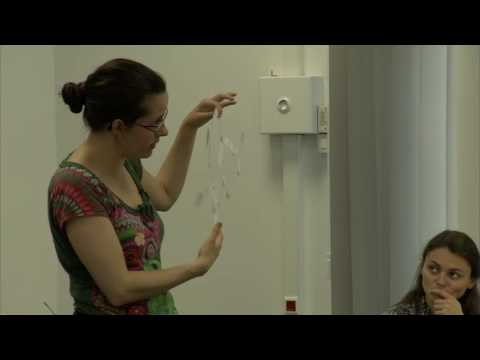

In [1]:
# Le bout de code ci-dessous, permet d'insérer la vidéo suivante qu'il faut regarder jusqu'à la fin!
from IPython.display import YouTubeVideo
YouTubeVideo('oqMx1cuw6mo', width = 800, height = 600)
# Les marmottes au sommeil léger par pixees Scienceparticipative(17min32s) 


![B&W_3D_Tree](https://github.com/ebuonocore/NSIT_09_Arbres/blob/main/sources/art_02.png?raw=true)  
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Arbre binaire noir et blanc 3D <a href ="https://hurna.io/fr/academy/data_structures/bst.html">hurna.io</a></span> 


---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. Novembre 2020 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)